# 데이터셋 준비

In [2]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

#### 데이터 전처리

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---
# SGDClassifier
- 사이킷런에서 확률적 경사하강법을 지원하는 대표적인 분류용 클래스가 `SGDClassifier`


#### (참고)손실 함수
- 이준 분류에서의 일반적인 손실 함수는 로지스틱 손실 함수(=이진 크로스엔트로피 손실함수(`BCE`))
- 다중 분류에서의 일반적인 손실 함수는 크로스엔트로피 손실 함수(`CE`)
- 회귀에서의 일반적인 손실 함수는 평균 제곱 오차(`MSE`)

In [7]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.775


/Users/hong/anaconda3/envs/AI_Tech_project1/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.8


---
# Epoch 및 오버피팅/언더피팅

In [11]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
for _ in range(0, 300): # (300 epoch와 동일)
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

#### epoch별 점수 시각화

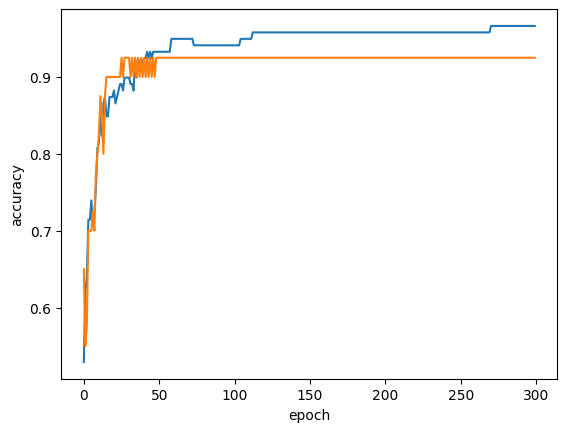

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

👉 그래프를 볼 때, 약 `100 epoch`정도부터는 오버피팅이 일어나는것으로 보인다.

- 따라서 `100 epoch`를 반복 훈련 횟수로 지정하고, 모델을 다시 학습시켜보자.

In [14]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


👉 `tol`매개변수는 early stopping을 지원하는 매개변수이다.

-  예를 들어 `tol=1e-3`으로 설정할 경우, 손실 함수의 개선 정도가 `0.001`보다 작을 경우 학습을 중단한다.
- `None`으로 설정했으므로 개선이 얼만큼 일어나든 무조건 100epoch를 돌고 종료한다.

loss함수를 바꿀 경우

In [15]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


👉 사실 `SGDClassifier`의 기본 손실 함수는 `hinge`이다.

- `SGDClassifier`는 매개변수를 통해 여러 손실 함수를 지원한다.
- (참고) `hinge` 손실은 SVM에서 자주 사용되는 손실 함수이다.
